# Импорт необходимых библиотек и модулей / Import necessary libraries and modules

In [6]:
import os
import json
import plotly.graph_objects as go
import random
import matplotlib.pyplot as plt

# Настройка путей к результам / Setting paths to results

In [7]:
current_directory = os.getcwd()
results_folder_name = "Results"
results_directory = os.path.join(current_directory, results_folder_name)
results_file_name = "Results.json"
results_file_path = os.path.join(results_directory, results_file_name)

with open(results_file_path, "r") as json_file:
    loaded_results_data = json.load(json_file)

# Определение ключевых слов для обращения к результатам из JSON файла / Defining keywords for accessing results from a JSON file

In [8]:
resuts_key_fluid_analysis = "Fluid_Analysis" # Ключ для расчетных значений в рамках FA
resuts_key_p_dis_water = "P_dis_water_case" # Ключ для расчетных значений в рамках анализа расчета перепада давления, создаваемым ЭЦН, при прокачке воды
resuts_key_p_dis_oil = "P_dis_oil_case" # Ключ для расчетных значений в рамках анализа расчета перепада давления, создаваемым ЭЦН, при прокачке ГЖС
resuts_key_p_dis_pipesim_dif_gor = "P_dis_pipesim_case_dif_gor"
resuts_key_p_dis_unifloc_dif_gor = "P_dis_unifloc_case_dif_gor"

results_key_pipesim = "PIPESIM" # Ключ, который характерезует данные, как рассчитанные в PIPESIM 
results_key_unifloc = "Unifloc" # Ключ, который характерезует данные, как рассчитанные в Unifloc

# Задаем ключи для параметров
pressure_key_bara = "pressure_bara"
pressure_key_atma = "pressure_atma"
viscosity_key_cp = "viscosity_cP"
temperature_key_C = "temperature_C"
solution_gas_key_m3m3 = "solution_gas_C"
fvf_key = "formation_volume_factor"
density_key_kg_m3 = "denstiy_kg_m3"
liquid_flowrate_key_sm3_day = "liquid_flowrate_sm3_day"

p_dis_oil_key = "Pdis_vs_Q_by_GOR" 

empty_key = "Empty"
empty_value = "Empty"

# Создание функции для сравнения графиков результатов PIPESIM и Unifloc / Creating a function for comparing the results graphs of PIPESIM and Unifloc

In [38]:
def create_comparison_plot(x_data_pipesim, y_data_pipesim, x_data_unifloc, y_data_unifloc, title, x_axis_title, y_axis_title, legend_pipesim, legend_unifloc):
    # Определение графиков / Define the traces
    trace_pipesim = go.Scatter(
        x=x_data_pipesim, 
        y=y_data_pipesim,
        mode='lines+markers', 
        name=legend_pipesim
    )

    trace_unifloc = go.Scatter(
        x=x_data_unifloc, 
        y=y_data_unifloc, 
        mode='lines+markers', 
        name=legend_unifloc
    )

    # Создание макета для графика / Create the layout for the plot
    layout = go.Layout(
        title=title,
        xaxis=dict(title=x_axis_title),
        yaxis=dict(title=y_axis_title)
    )

    # Создание графика / Create the figure
    fig = go.Figure(data=[trace_pipesim, trace_unifloc], layout=layout)

    # Отображение графика / Display the plot
    fig.show()

# Распределение температуры в PIPESIM / Temperature distribution in PIPESIM

In [39]:
if empty_key not in loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim]:
    # Определение данных температуры из модели PIPESIM
    trace_pipesim_temperature = go.Scatter(x=loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara], 
                                        y=loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][temperature_key_C], 
                                        mode='lines+markers', 
                                        name='PIPESIM Temperature')

    # Создание макета графика для температуры
    layout_temperature = go.Layout(title='Pressure vs Temperature', 
                                xaxis=dict(title='Pressure (bara)'), 
                                yaxis=dict(title='Temperature (C)'))


    fig_temperature = go.Figure(data=trace_pipesim_temperature, layout=layout_temperature)
    fig_temperature.show()
else:
    print("Результаты расчета отсутствуют.")

Убеждаемся, что температура, использованная в модели PIPESIM, остается постоянной.

# Сравнение результатов расчета вязкости / Comparison of Viscosity Calculation Results

In [40]:
if empty_key not in loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim]:
    create_comparison_plot(
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara],
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][viscosity_key_cp], 
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara], # (atma) уже переведены в (bara) 
        loaded_results_data[resuts_key_fluid_analysis][results_key_unifloc][viscosity_key_cp],
        'Pressure vs Viscosity Comparison',
        'Pressure (bara)',
        'Viscosity (cP)',
        'PIPESIM Viscosity',
        'Unifloc Viscosity (PVT_mu_oil_cP)'
    )
else:
    print("Результаты расчета отсутствуют.")

# Сравнение результатов расчета газосодержания в PIPESIM и Unifloc VBA / # Comparison of solution gas

In [41]:
if empty_key not in loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim]:
    create_comparison_plot(
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara],
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][solution_gas_key_m3m3], 
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara], # (atma) уже переведены в (bara) 
        loaded_results_data[resuts_key_fluid_analysis][results_key_unifloc][solution_gas_key_m3m3],
        'Solution Gas vs Pressure',
        'Pressure (bara)',
        'Solution Gas (sm3/sm3)',
        'Solution Gas in PIPESIM',
        'Solution Gas in Unifloc'
    )
else:
    print("Результаты расчета отсутствуют.")

# Сравнение результатов расчета Объемного Коэф. в PIPESIM и Unifloc VBA / Comparison of formation volume factor

In [42]:
if empty_key not in loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim]:
    create_comparison_plot(
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara],
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][fvf_key], 
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara], # (atma) уже переведены в (bara) 
        loaded_results_data[resuts_key_fluid_analysis][results_key_unifloc][fvf_key],
        'FVF vs Pressure',
        'Pressure (bara)',
        'FVF',
        'FVF in PIPESIM',
        'FVF in Unifloc'
    )
else:
    print("Результаты расчета отсутствуют.")

# Сравнение результатов расчета вязкости в PIPESIM и Unifloc VBA / Comparison of viscosity

In [43]:
if empty_key not in loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim]:
    create_comparison_plot(
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara],
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][density_key_kg_m3], 
        loaded_results_data[resuts_key_fluid_analysis][results_key_pipesim][pressure_key_bara], # (atma) уже переведены в (bara) 
        loaded_results_data[resuts_key_fluid_analysis][results_key_unifloc][density_key_kg_m3],
        'Density vs Pressure',
        'Pressure (bara)',
        'Density (kg/m3)',
        'Density in PIPESIM',
        'Density in Unifloc'
    )
else:
    print("Результаты расчета отсутствуют.")

# Основные выводы / Main conclusions

- Результаты расчетов вязкости и газосодержания одинаковые
- Есть незначительные расхождения в объемном коэффициенте и вязкости

# Сравнение расчета давления на выходе ЭЦН в PIPESIM и Unifloc (флюид - вода) / Comparison of ESP Discharge Pressure Calculation in PIPESIM and Unifloc (fluid - water)

In [9]:
if empty_key not in loaded_results_data[resuts_key_p_dis_water][results_key_pipesim]:
    # Выбор случайного цвета для построения графика
    random_color = f'rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})'

    fig = go.Figure()

    # Добавление линий на график
    fig.add_trace(go.Scatter(x=loaded_results_data[resuts_key_p_dis_water][results_key_pipesim][liquid_flowrate_key_sm3_day], 
                            y=loaded_results_data[resuts_key_p_dis_water][results_key_pipesim][pressure_key_atma],
                            mode='lines', name='PIPESIM', line=dict(color=random_color)))

    fig.add_trace(go.Scatter(x=loaded_results_data[resuts_key_p_dis_water][results_key_unifloc][liquid_flowrate_key_sm3_day], 
                            y=loaded_results_data[resuts_key_p_dis_water][results_key_unifloc][pressure_key_atma],
                            mode='lines', name='Unifloc', line=dict(color=random_color, dash='dash')))

    # Обновление графика
    fig.update_layout(
        title='Pressure Discharge Characteristics of ESP',
        xaxis_title='Liquid Flow Rate (sm3/day)',
        yaxis_title='Pressure (atma)',
        legend_title='Source'
    )

    # Отображение графика
    fig.show()
else:
    print("Результаты расчета отсутствуют.")

Результаты расчета давления на выходе из ЭЦН (флюид - вода) в PIPESIM и Unifloc совпадают.

In [12]:
# Значения для оси X и Y для Petex
x_values = [5, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550]
y_values = [156.0720032, 156.0522648, 156.1312186, 156.0720032, 155.7068417, 154.9666495, 153.8810342, 152.5486881, 
            151.0979113, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 
            150.0024268, 150.0024268, 150.0024268, 150.0024268, 156.5062493, 153.0618881, 150.0024268]

if empty_key not in loaded_results_data[resuts_key_p_dis_water][results_key_pipesim]:
    # Предопределённые цвета для линий
    color_pipesim = 'rgb(0, 123, 255)'  # Насыщенный синий
    color_unifloc = 'rgb(40, 167, 69)'  # Насыщенный зелёный
    color_petex = 'rgb(255, 193, 7)'    # Насыщенный оранжевый

    fig = go.Figure()

    # Добавление линий на график
    fig.add_trace(go.Scatter(x=loaded_results_data[resuts_key_p_dis_water][results_key_pipesim][liquid_flowrate_key_sm3_day], 
                             y=loaded_results_data[resuts_key_p_dis_water][results_key_pipesim][pressure_key_atma],
                             mode='lines', name='PIPESIM', line=dict(color=color_pipesim)))

    fig.add_trace(go.Scatter(x=loaded_results_data[resuts_key_p_dis_water][results_key_unifloc][liquid_flowrate_key_sm3_day], 
                             y=loaded_results_data[resuts_key_p_dis_water][results_key_unifloc][pressure_key_atma],
                             mode='lines', name='Unifloc', line=dict(color=color_unifloc)))

    # Добавление новых значений для Petex
    fig.add_trace(go.Scatter(x=x_values, y=y_values,
                             mode='lines', name='Petex', line=dict(color=color_petex)))

    # Обновление графика
    fig.update_layout(
        title='Pressure Discharge Characteristics of ESP - Petex',
        xaxis_title='Liquid Flow Rate (sm3/day)',
        yaxis_title='Pressure (atma)',
        legend_title='Source'
    )

    # Отображение графика
    fig.show()
else:
    print("Результаты расчета отсутствуют.")

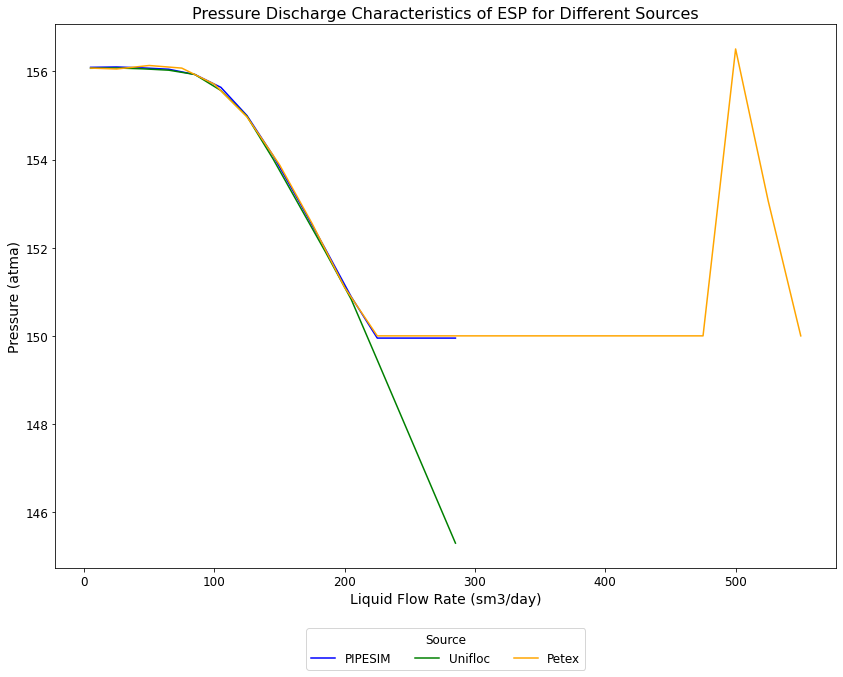

In [20]:
all_colors = ['blue', 'green', 'orange', 'purple', 'brown']
used_colors = set()

# Настройка увеличенного размера графика
fig, ax = plt.subplots(figsize=(14, 10))  # Размер графика 14x10 дюймов

# Установка белого фона для графика и всей области
fig.patch.set_facecolor('white')  # Фон области вокруг графика
ax.set_facecolor('white')  # Фон самого графика

# Настройка шрифта
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})  # Размер и стиль шрифта

# Значения для оси X и Y для Petex
x_values = [5, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550]
y_values = [156.0720032, 156.0522648, 156.1312186, 156.0720032, 155.7068417, 154.9666495, 153.8810342, 152.5486881,
            151.0979113, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 
            150.0024268, 150.0024268, 150.0024268, 150.0024268, 156.5062493, 153.0618881, 150.0024268]

if 'empty_key' not in loaded_results_data[resuts_key_p_dis_water][results_key_pipesim]:
    # Итерируем по разным источникам данных (PIPESIM, Unifloc и Petex)
    for source, label in zip([results_key_pipesim, results_key_unifloc, 'Petex'], ['PIPESIM', 'Unifloc', 'Petex']):
        color = all_colors[len(used_colors) % len(all_colors)]
        used_colors.add(color)

        if source == 'Petex':
            # Для Petex используем заранее заданные значения
            pressure_values = y_values
            flowrate_values = x_values
        else:
            # Получаем данные для PIPESIM и Unifloc
            pressure_values = loaded_results_data[resuts_key_p_dis_water][source][pressure_key_atma]
            flowrate_values = loaded_results_data[resuts_key_p_dis_water][source][liquid_flowrate_key_sm3_day]

        # Добавляем данные на график
        ax.plot(flowrate_values, pressure_values, label=f'{label}', color=color)

    # Настройки графика
    ax.set_title('Pressure Discharge Characteristics of ESP for Different Sources', fontsize=16)
    ax.set_xlabel('Liquid Flow Rate (sm3/day)', fontsize=14)
    ax.set_ylabel('Pressure (atma)', fontsize=14)
    ax.legend(title='Source', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)
    
    # plt.savefig('pipesim_graph.png', bbox_inches='tight', facecolor='white', edgecolor='white')
    plt.show()
else:
    print("Результаты расчета отсутствуют.")

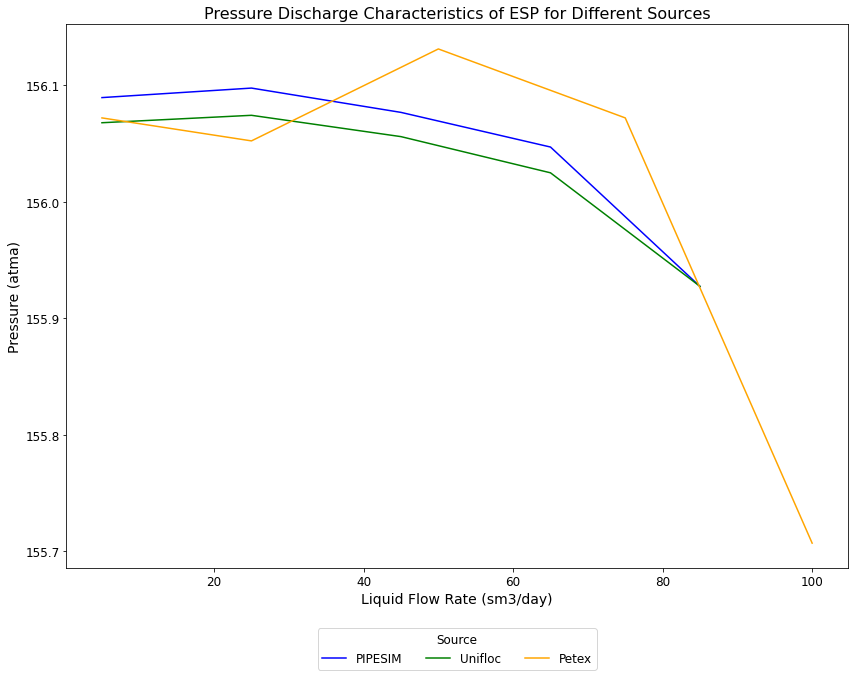

In [21]:
all_colors = ['blue', 'green', 'orange', 'purple', 'brown']
used_colors = set()

fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})

x_values = [5, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550]
y_values = [156.0720032, 156.0522648, 156.1312186, 156.0720032, 155.7068417, 154.9666495, 153.8810342, 152.5486881,
            151.0979113, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 150.0024268, 
            150.0024268, 150.0024268, 150.0024268, 150.0024268, 156.5062493, 153.0618881, 150.0024268]

x_min, x_max = 0, 100

if 'empty_key' not in loaded_results_data[resuts_key_p_dis_water][results_key_pipesim]:
    for source, label in zip([results_key_pipesim, results_key_unifloc, 'Petex'], ['PIPESIM', 'Unifloc', 'Petex']):
        color = all_colors[len(used_colors) % len(all_colors)]
        used_colors.add(color)

        if source == 'Petex':
            pressure_values = y_values
            flowrate_values = x_values
        else:
            pressure_values = loaded_results_data[resuts_key_p_dis_water][source][pressure_key_atma]
            flowrate_values = loaded_results_data[resuts_key_p_dis_water][source][liquid_flowrate_key_sm3_day]

        filtered_flowrate = [x for x in flowrate_values if x_min <= x <= x_max]
        filtered_pressure = [pressure_values[i] for i, x in enumerate(flowrate_values) if x_min <= x <= x_max]

        ax.plot(filtered_flowrate, filtered_pressure, label=f'{label}', color=color)

    ax.set_title('Pressure Discharge Characteristics of ESP for Different Sources', fontsize=16)
    ax.set_xlabel('Liquid Flow Rate (sm3/day)', fontsize=14)
    ax.set_ylabel('Pressure (atma)', fontsize=14)
    ax.legend(title='Source', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)
    
    plt.show()
else:
    print("Результаты расчета отсутствуют.")


# Сравнение расчета давления на выходе ЭЦН в PIPESIM и Unifloc (флюид - нефть) / Comparison of ESP Discharge Pressure Calculation in PIPESIM and Unifloc (fluid - oil)

In [45]:
if empty_key not in loaded_results_data[resuts_key_p_dis_oil][results_key_pipesim]:

    fig = go.Figure()

    # Доступные цвета для линий
    all_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
    used_colors = set()

    # Итерируем по GOR
    for gor_value in loaded_results_data[resuts_key_p_dis_oil][results_key_pipesim][p_dis_oil_key]:
        color = all_colors[len(used_colors) % len(all_colors)]
        used_colors.add(color)

        # Получаем данные для PIPESIM и Unifloc
        pressure_pipesim = loaded_results_data[resuts_key_p_dis_oil][results_key_pipesim][p_dis_oil_key][gor_value][pressure_key_atma]
        pressure_unifloc = loaded_results_data[resuts_key_p_dis_oil][results_key_unifloc][p_dis_oil_key][gor_value][pressure_key_atma]
        liquid_rate_pipesim = loaded_results_data[resuts_key_p_dis_oil][results_key_pipesim][p_dis_oil_key][gor_value][liquid_flowrate_key_sm3_day]
        liquid_rate_unifloc = loaded_results_data[resuts_key_p_dis_oil][results_key_unifloc][p_dis_oil_key][gor_value][liquid_flowrate_key_sm3_day]
        
        # Добавляем данные для PIPESIM
        fig.add_trace(go.Scatter(x=liquid_rate_pipesim , y=pressure_pipesim, mode='lines',
                                name=f'PIPESIM (GOR = {gor_value})', line=dict(color=color)))
        
        # Добавляем данные для Unifloc
        fig.add_trace(go.Scatter(x=liquid_rate_unifloc, y=pressure_unifloc, mode='lines',
                                name=f'Unifloc (GOR = {gor_value})', line=dict(color=color, dash='dash')))

    # Настройки графика
    fig.update_layout(
        title='Dependence of Discharge Pressure on Liquid Flow Rate for Different GOR values',
        xaxis_title='Liquid Flow Rate (sm3/day)',
        yaxis_title='Pressure (atma)',
        legend_title='Source'
    )

    # Показываем график
    fig.show()
else:
    print("Результаты расчета отсутствуют.")

# Сравнение расчета давления на выходе ЭЦН в PIPESIM (флюид - нефть) / Comparison of ESP Discharge Pressure Calculation in PIPESIM (fluid - oil)

In [22]:
if empty_key not in loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim]:

    fig = go.Figure()

    # Доступные цвета для линий
    all_colors = ['blue', 'cyan', 'green', 'magenta', 'black', 'orange', 'purple', 'brown']
    used_colors = set()

    # Итерируем по GOR
    for gor_value in loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key]:
        color = all_colors[len(used_colors) % len(all_colors)]
        used_colors.add(color)

        # Получаем данные для PIPESIM и Unifloc
        pressure_pipesim = loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key][gor_value][pressure_key_atma]
        liquid_rate_pipesim = loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key][gor_value][liquid_flowrate_key_sm3_day]
        
        # Добавляем данные для PIPESIM
        fig.add_trace(go.Scatter(x=liquid_rate_pipesim , y=pressure_pipesim, mode='lines',
                                name=f'PIPESIM (GOR = {gor_value})', line=dict(color=color)))

    # Настройки графика
    fig.update_layout(
        title='Dependence of Discharge Pressure on Liquid Flow Rate for Different GOR values',
        xaxis_title='Liquid Flow Rate (sm3/day)',
        yaxis_title='Pressure (atma)',
        legend_title='Source'
    )

    # Показываем график
    fig.show()
else:
    print("Результаты расчета отсутствуют.")

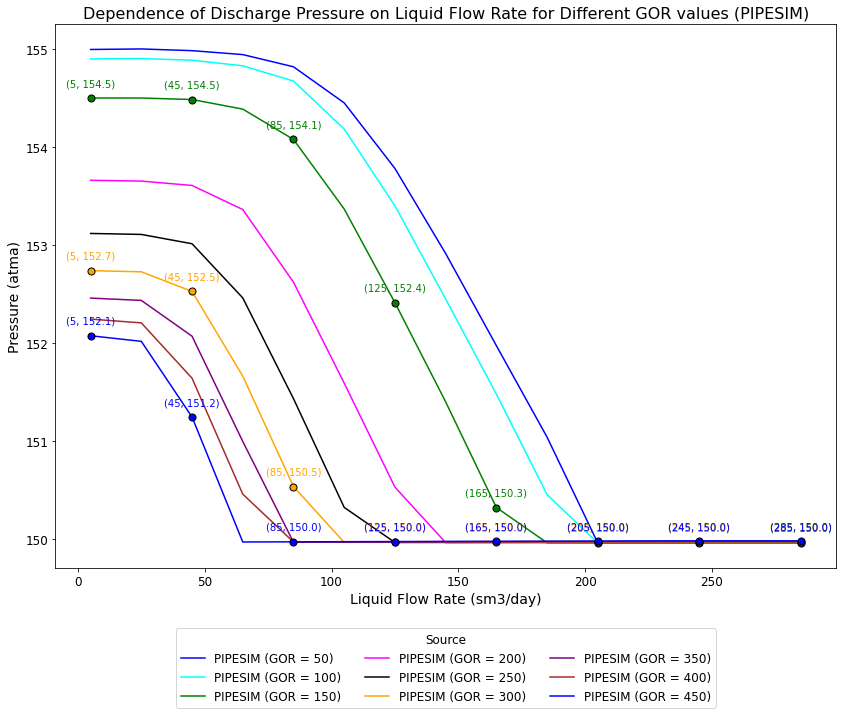

In [23]:
# Доступные цвета для линий (исключены желтый и красный)
all_colors = ['blue', 'cyan', 'green', 'magenta', 'black', 'orange', 'purple', 'brown']
used_colors = set()

# Настройка увеличенного размера графика
fig, ax = plt.subplots(figsize=(14, 10))  # Размер графика 14x10 дюймов

# Установка белого фона для графика и всей области
fig.patch.set_facecolor('white')  # Фон области вокруг графика
ax.set_facecolor('white')  # Фон самого графика

# Настройка шрифта
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})  # Размер и стиль шрифта

if 'empty_key' not in loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim]:
    # Итерируем по GOR
    for idx, gor_value in enumerate(loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key]):
        color = all_colors[len(used_colors) % len(all_colors)]
        used_colors.add(color)

        # Получаем данные для PIPESIM
        pressure_pipesim = loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key][gor_value][pressure_key_atma]
        liquid_rate_pipesim = loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key][gor_value][liquid_flowrate_key_sm3_day]

        # Добавляем данные для PIPESIM
        ax.plot(liquid_rate_pipesim, pressure_pipesim, label=f'PIPESIM (GOR = {gor_value})', color=color)

        # Добавляем подписи точек для каждой третьей линии и каждой второй точки по y
        if (idx + 1) % 3 == 0:
            for i in range(0, len(liquid_rate_pipesim), 2):  # Шаг 2 для каждого второго значения
                # Отображаем точки на линии и подписываем их
                ax.scatter(liquid_rate_pipesim[i], pressure_pipesim[i], color=color, edgecolor='black', s=50, zorder=5)  # Добавляем маркеры
                ax.text(liquid_rate_pipesim[i], pressure_pipesim[i] + 0.1,  # Поднимаем текст выше на 0.5
                        f'({liquid_rate_pipesim[i]:.0f}, {pressure_pipesim[i]:.1f})', 
                        fontsize=10, color=color, ha='center', va='bottom')  # Центрируем и размещаем текст над точкой

    # Настройки графика
    ax.set_title('Dependence of Discharge Pressure on Liquid Flow Rate for Different GOR values (PIPESIM)', fontsize=16)
    ax.set_xlabel('Liquid Flow Rate (sm3/day)', fontsize=14)
    ax.set_ylabel('Pressure (atma)', fontsize=14)
    ax.legend(title='Source', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)
    
    plt.savefig('pipesim_graph.png', bbox_inches='tight', facecolor='white', edgecolor='white')
    plt.show()
else:
    print("Результаты расчета отсутствуют.")

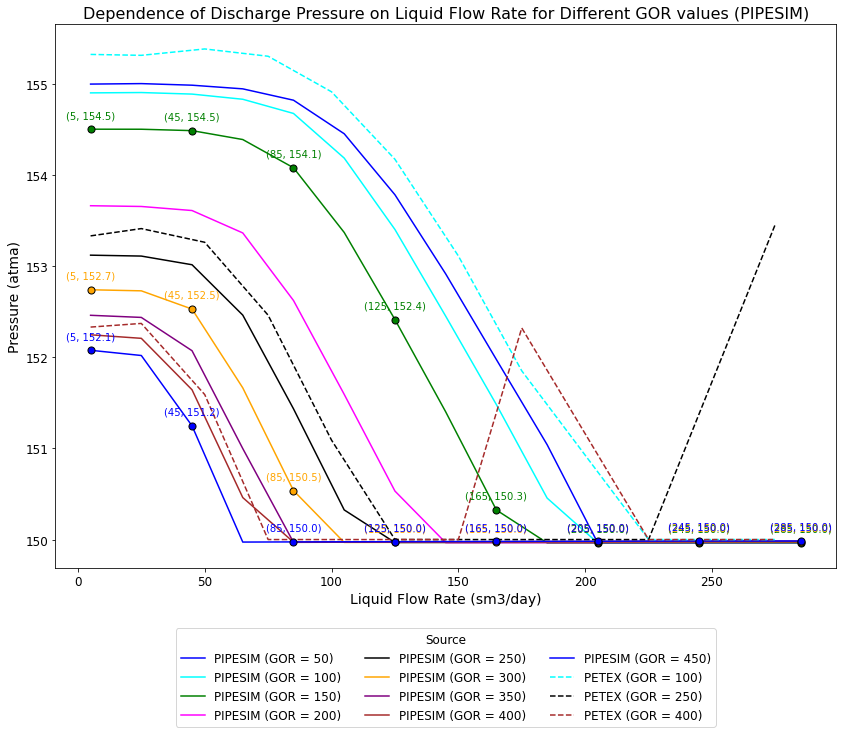

In [29]:
all_colors = ['blue', 'cyan', 'green', 'magenta', 'black', 'orange', 'purple', 'brown']
used_colors = set()

fig, ax = plt.subplots(figsize=(14, 10))

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})

if 'empty_key' not in loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim]:
    for idx, gor_value in enumerate(loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key]):
        color = all_colors[len(used_colors) % len(all_colors)]
        used_colors.add(color)

        pressure_pipesim = loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key][gor_value][pressure_key_atma]
        liquid_rate_pipesim = loaded_results_data[resuts_key_p_dis_pipesim_dif_gor][results_key_pipesim][p_dis_oil_key][gor_value][liquid_flowrate_key_sm3_day]

        ax.plot(liquid_rate_pipesim, pressure_pipesim, label=f'PIPESIM (GOR = {gor_value})', color=color)

        if (idx + 1) % 3 == 0:
            for i in range(0, len(liquid_rate_pipesim), 2):
                ax.scatter(liquid_rate_pipesim[i], pressure_pipesim[i], color=color, edgecolor='black', s=50, zorder=5)
                ax.text(liquid_rate_pipesim[i], pressure_pipesim[i] + 0.1,
                        f'({liquid_rate_pipesim[i]:.0f}, {pressure_pipesim[i]:.1f})',
                        fontsize=10, color=color, ha='center', va='bottom')

    liquid_rate_petex = [5, 25, 50, 75, 100, 125, 150, 175, 225, 275]
    pressure_petex = [155.32, 155.31, 155.38, 155.30, 154.91, 154.17, 153.11, 151.85, 150.00, 150.00]
    
    petex_color = 'cyan'
    
    ax.plot(liquid_rate_petex, pressure_petex, label='PETEX (GOR = 100)', linestyle='--', color=petex_color)

    liquid_rate_gor_250 = [5, 25, 50, 75, 100, 125, 150, 175, 225, 275]
    pressure_gor_250 = [153.33, 153.41, 153.26, 152.46, 151.09, 150.00, 150.00, 150.00, 150.00, 153.46]
    
    gor_250_color = 'black'
    
    ax.plot(liquid_rate_gor_250, pressure_gor_250, label='PETEX (GOR = 250)', linestyle='--', color=gor_250_color)

    liquid_rate_gor_400 = [5, 25, 50, 75, 100, 125, 150, 175, 225, 275]
    pressure_gor_400 = [152.33, 152.37, 151.59, 150.00, 150.00, 150.00, 150.00, 152.32, 150.00, 150.00]

    gor_400_color = 'brown'

    ax.plot(liquid_rate_gor_400, pressure_gor_400, label='PETEX (GOR = 400)', linestyle='--', color=gor_400_color)

    ax.set_title('Dependence of Discharge Pressure on Liquid Flow Rate for Different GOR values (PIPESIM)', fontsize=16)
    ax.set_xlabel('Liquid Flow Rate (sm3/day)', fontsize=14)
    ax.set_ylabel('Pressure (atma)', fontsize=14)
    ax.legend(title='Source', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)
    
    plt.savefig('pipesim_graph.png', bbox_inches='tight', facecolor='white', edgecolor='white')
    plt.show()
else:
    print("Результаты расчета отсутствуют.")


# Сравнение расчета давления на выходе ЭЦН в Unifloc (флюид - нефть) / Comparison of ESP Discharge Pressure Calculation in Unifloc (fluid - oil)

In [35]:
if empty_key not in loaded_results_data[resuts_key_p_dis_unifloc_dif_gor][results_key_unifloc]:

    fig = go.Figure()

    # Доступные цвета для линий
    all_colors = ['blue', 'cyan', 'green', 'magenta', 'black', 'orange', 'purple', 'brown']
    used_colors = set()

    # Итерируем по GOR
    for gor_value in loaded_results_data[resuts_key_p_dis_unifloc_dif_gor][results_key_unifloc][p_dis_oil_key]:
        color = all_colors[len(used_colors) % len(all_colors)]
        used_colors.add(color)

        # Получаем данные для Unifloc
        pressure_unifloc = loaded_results_data[resuts_key_p_dis_unifloc_dif_gor][results_key_unifloc][p_dis_oil_key][gor_value][pressure_key_atma]
        liquid_rate_unifloc = loaded_results_data[resuts_key_p_dis_unifloc_dif_gor][results_key_unifloc][p_dis_oil_key][gor_value][liquid_flowrate_key_sm3_day]
        
        # Добавляем данные для Unifloc
        fig.add_trace(go.Scatter(x=liquid_rate_unifloc, y=pressure_unifloc, mode='lines',
                                name=f'Unifloc (GOR = {gor_value})', line=dict(color=color)))

    # Настройки графика
    fig.update_layout(
        title='Dependence of Discharge Pressure on Liquid Flow Rate for Different GOR Values',
        xaxis_title='Liquid Flow Rate (sm3/day)',
        yaxis_title='Pressure (atma)',
        legend_title='Source'
    )

    # Показываем график
    fig.show()
else:
    print("Результаты расчета отсутствуют.")

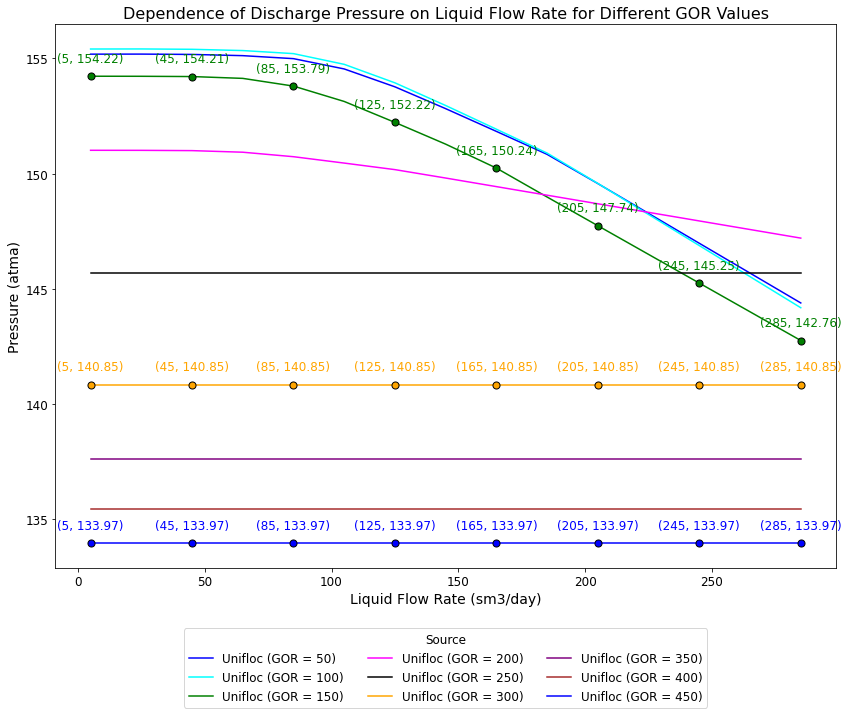

In [36]:
# Доступные цвета для линий (исключены желтый и красный)
all_colors = ['blue', 'cyan', 'green', 'magenta', 'black', 'orange', 'purple', 'brown']
used_colors = set()

# Настройка увеличенного размера графика
fig, ax = plt.subplots(figsize=(14, 10))  # Размер графика 14x10 дюймов

# Установка белого фона для графика и всей области
fig.patch.set_facecolor('white')  # Фон области вокруг графика
ax.set_facecolor('white')  # Фон самого графика

# Настройка шрифта
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})  # Размер и стиль шрифта

if 'empty_key' not in loaded_results_data[resuts_key_p_dis_unifloc_dif_gor][results_key_unifloc]:
    # Итерируем по GOR
    for idx, gor_value in enumerate(loaded_results_data[resuts_key_p_dis_unifloc_dif_gor][results_key_unifloc][p_dis_oil_key]):
        color = all_colors[len(used_colors) % len(all_colors)]
        used_colors.add(color)

        # Получаем данные для Unifloc
        pressure_unifloc = loaded_results_data[resuts_key_p_dis_unifloc_dif_gor][results_key_unifloc][p_dis_oil_key][gor_value][pressure_key_atma]
        liquid_rate_unifloc = loaded_results_data[resuts_key_p_dis_unifloc_dif_gor][results_key_unifloc][p_dis_oil_key][gor_value][liquid_flowrate_key_sm3_day]

        # Добавляем данные для Unifloc
        ax.plot(liquid_rate_unifloc, pressure_unifloc, label=f'Unifloc (GOR = {gor_value})', color=color)

        # Добавляем подписи точек для каждой третьей линии и каждой второй точки по y
        if (idx + 1) % 3 == 0:
            for i in range(0, len(liquid_rate_unifloc), 2):  # Шаг 2 для каждого второго значения
                # Отображаем точки на линии и подписываем их
                ax.scatter(liquid_rate_unifloc[i], pressure_unifloc[i], color=color, edgecolor='black', s=50, zorder=5)  # Добавляем маркеры
                ax.text(liquid_rate_unifloc[i], pressure_unifloc[i] + 0.5,  # Поднимаем текст выше на 0.5
                        f'({liquid_rate_unifloc[i]:.0f}, {pressure_unifloc[i]:.2f})', 
                        fontsize=12, color=color, ha='center', va='bottom')  # Центрируем и размещаем текст над точкой

    # Настройки графика
    ax.set_title('Dependence of Discharge Pressure on Liquid Flow Rate for Different GOR Values', fontsize=16)
    ax.set_xlabel('Liquid Flow Rate (sm3/day)', fontsize=14)
    ax.set_ylabel('Pressure (atma)', fontsize=14)

    # Настройка легенды под графиком
    ax.legend(title='Source', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)  # Легенда под графиком

    # Сохраняем график в текущую директорию с белым фоном вокруг
    plt.savefig('unifloc_graph.png', bbox_inches='tight', facecolor='white', edgecolor='white')  # Учитываем легенду при сохранении

    # Показываем график
    plt.show()
else:
    print("Результаты расчета отсутствуют.")